In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv("/content/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### **EDA ON DATASET**

In [3]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [4]:
df.shape[0],df.shape[1]

(545, 13)

In [5]:
len(df)

545

In [6]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [9]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [10]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [11]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [12]:
df.mainroad.value_counts

<bound method IndexOpsMixin.value_counts of 0      yes
1      yes
2      yes
3      yes
4      yes
      ... 
540    yes
541     no
542    yes
543     no
544    yes
Name: mainroad, Length: 545, dtype: object>

In [13]:
df.mainroad.unique()

array(['yes', 'no'], dtype=object)

In [14]:
df.mainroad.value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [15]:
newdf=df.copy()

In [16]:
newdf.mainroad.replace(['yes','no'],[1,0],inplace=True)

In [17]:
newdf.mainroad.value_counts()

1    468
0     77
Name: mainroad, dtype: int64

In [18]:
newdf.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,1,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,yes,yes,no,yes,2,no,furnished


In [19]:
newdf.guestroom.replace(['yes','no'],[1,0],inplace=True)

In [20]:
newdf.basement.replace(['yes','no'],[1,0],inplace=True)

In [21]:
newdf.hotwaterheating.replace(['yes','no'],[1,0],inplace=True)

In [22]:
newdf.airconditioning.replace(['yes','no'],[1,0],inplace=True)

In [23]:
newdf.prefarea.replace(['yes','no'],[1,0],inplace=True)

In [24]:
newdf.furnishingstatus.value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [25]:
newdf.furnishingstatus.replace(['unfurnished','semi-furnished','furnished'],[0,1,2],inplace=True)

In [26]:
newdf.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [27]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [28]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


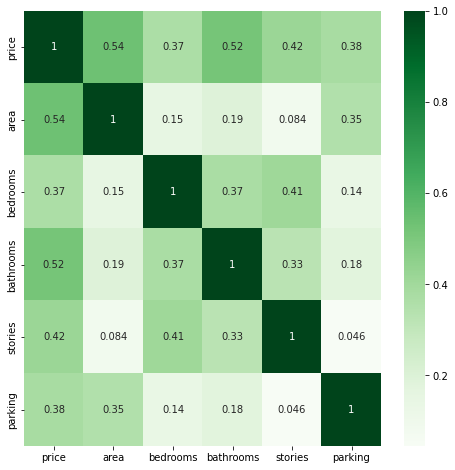

In [29]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='Greens')

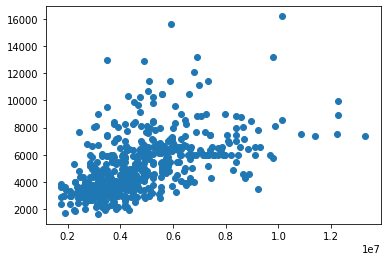

In [30]:
plt.scatter(df.price,df.area)

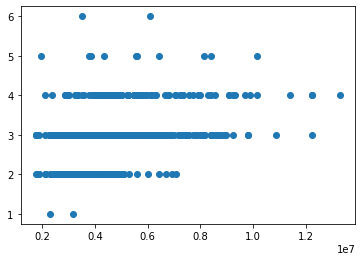

In [31]:
plt.scatter(df.price,df.bedrooms)

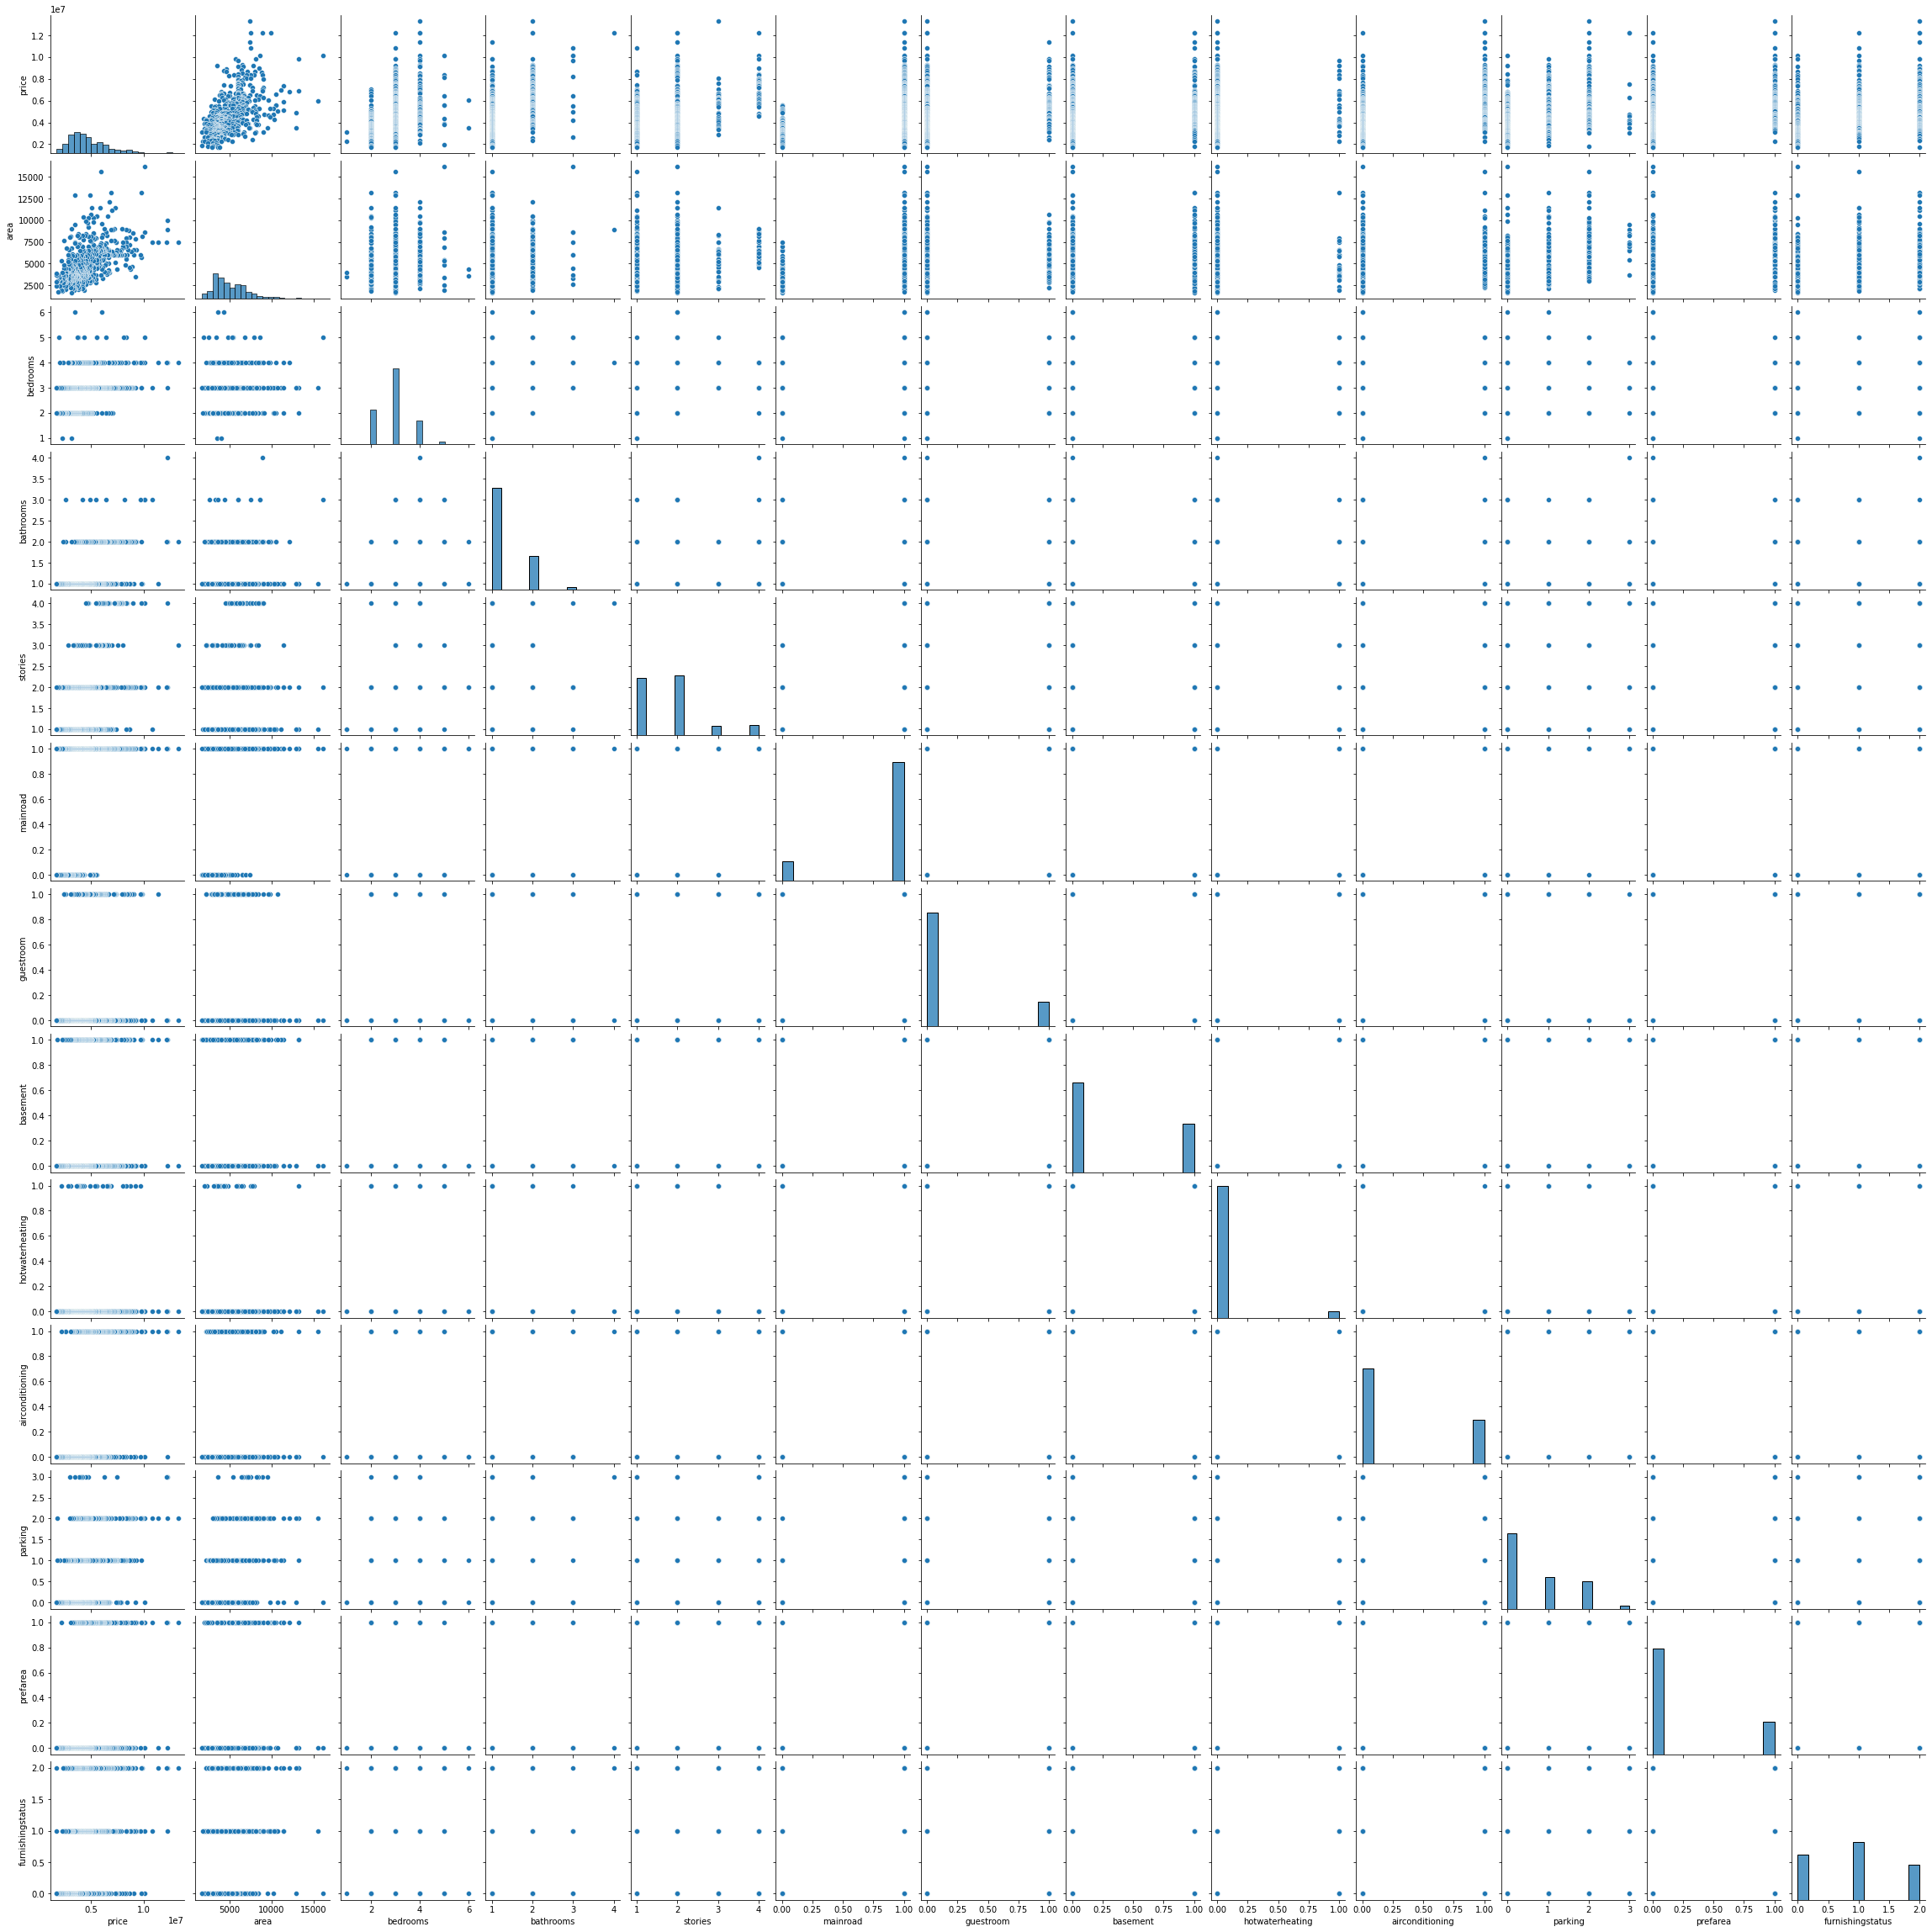

In [32]:
sns.pairplot(newdf)

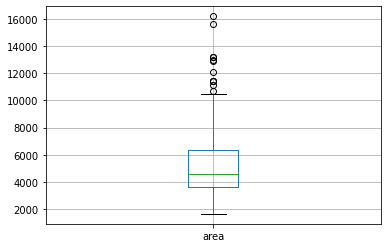

In [33]:
df[['area']].boxplot()

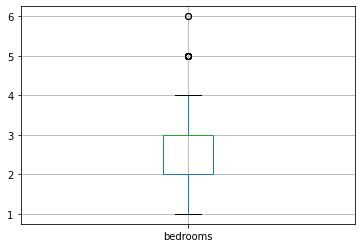

In [34]:
df[['bedrooms']].boxplot()

In [35]:
df.bedrooms[df.bedrooms>4].value_counts().sum()

12

In [36]:
df.area[df.area>10000].value_counts().sum()

18

In [37]:
len(df.mainroad.loc[df.mainroad==0])

0

###**Splitting Dataset into Training & Testing**

In [59]:
x=newdf.drop('price',axis=1)
y=newdf.price

In [60]:
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,2
1,8960,4,4,4,1,0,0,0,1,3,0,2
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,2
4,7420,4,1,2,1,1,1,0,1,2,0,2


In [61]:
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [63]:
len(x_train),len(y_train),len(x_test),len(y_test)

(436, 436, 109, 109)

###**Model Train**

In [64]:
model=LinearRegression()

In [65]:
model.fit(x_train,y_train)

LinearRegression()

In [66]:
model.intercept_

-127711.167392442

In [67]:
model.coef_

array([2.35848772e+02, 7.85744924e+04, 1.09711727e+06, 4.06223164e+05,
       3.66824192e+05, 2.33146766e+05, 3.93159779e+05, 6.87881311e+05,
       7.85550579e+05, 2.25756514e+05, 6.29901661e+05, 2.10397118e+05])

In [68]:
pred_y=model.predict(x_test)

In [69]:
pred_y[0:5]

array([5203691.70963178, 7257004.02115476, 3062828.59668171,
       4559591.65374424, 3332932.30559782])

In [70]:
y_test[0:5]

316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
Name: price, dtype: int64

In [73]:
pred_df=pd.DataFrame({"Actual Value ":y_test,"Predicted Value":pred_y})

In [74]:
pred_df

,Actual Value,Predicted Value
316,4060000,5.203692e+06
77,6650000,7.257004e+06
360,3710000,3.062829e+06
90,6440000,4.559592e+06
493,2800000,3.332932e+06
...,...,...
15,9100000,4.933137e+06
357,3773000,4.377133e+06
39,7910000,7.009335e+06
54,7350000,6.351461e+06


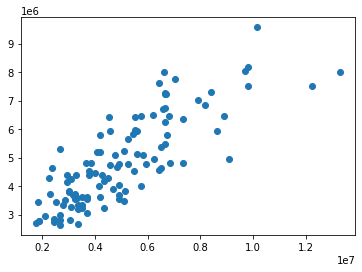

In [75]:
plt.scatter(y_test,pred_y)

In [76]:
pred_df.corr()

,Actual Value,Predicted Value
Actual Value,1.00000,0.81839
Predicted Value,0.81839,1.00000


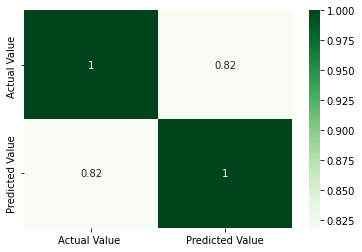

In [77]:
sns.heatmap(pred_df.corr(),annot=True,cmap="Greens")

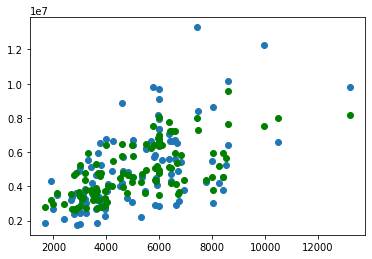

In [78]:
plt.scatter(x_test.area,y_test)
plt.scatter(x_test.area,pred_y,color="green")